# SIMPLE LINEAR REGRESSION

In [1]:
# Required libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")  # Load the dataset to dataframe

In [3]:
df.head()  # Read the first 5 datas 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape  # from this we could see dataset has 25 rows and 2 column by using the shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Observation: by using describe we could see some stats for the dataset.

Count is basically shows the number of data present in the dataset.
Mean is average of the each variable 5 mean for hours and 51 mean for score.
standard deviation for hours is 2.5 and 25 stdv for score


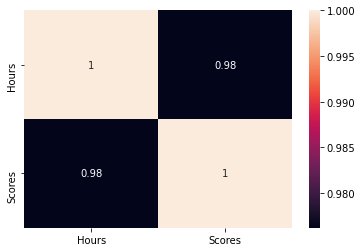

In [6]:
corr_matrix = df.corr()
import seaborn as sns
sns.heatmap(corr_matrix, annot = True)
plt.show()

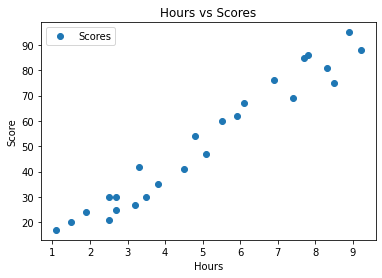

In [7]:
df.plot(x='Hours',y='Scores',style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

Observation: We could see that the two variables are highly positive correlation 0.98

As of now we have seen the statistics and EDA of the data set now we will split the dataset into tarining and test dataset to perdict

In [8]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [9]:
# splitting the train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 1/3, random_state = 0)

In [10]:
#selecting the linear regission from the sklearn

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

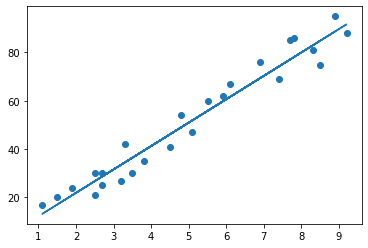

In [11]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [12]:
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)

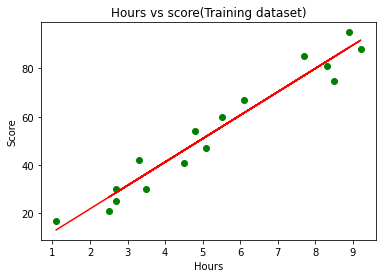

In [13]:
plt.scatter(x_train,y_train,color = "green")
plt.plot(x_train,x_pred, color = "red")
plt.title("Hours vs score(Training dataset)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [14]:
y_pred = regressor.predict(x_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

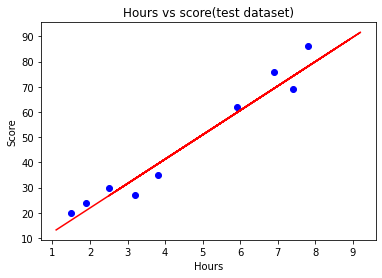

In [15]:
plt.scatter(x_test,y_test,color = "blue")
plt.plot(x_train,x_pred,color = "red")
plt.title("Hours vs score(test dataset)")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [16]:
data = pd.DataFrame({'Predicted Values':y_test,'Actual Values': y_pred})
data

,Predicted Values,Actual Values
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9555700801388128


In [18]:
x = df["Hours"].to_numpy()
y = df["Scores"].to_numpy()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [19]:
# You can also test with your own data
Scor = regressor.predict([[9.5]])
print("The Score for 9.5 hours is",Scor)

The Score for 9.5 hours is [94.56788932]
